In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
from scripts.filters import VelocityFilter, UltimateFilter, DeltaTimeFixPredict

In [2]:
radar_df = DeltaTimeFixPredict().apply(
    pd.read_csv("../data/processed data/radar_data_52.csv")
)
lidar_df = pd.read_csv("../data/processed data/lidar_data_52.csv")
clean_radar_df = radar_df[radar_df["QPDH0"] < 0.5]
with open(
    f"../data/raw data/radar_positions.json", "r"
) as file:  # считываем корды радара
    radar_positions = {float(k): v for k, v in json.load(file).items()}
len(radar_df), len(clean_radar_df)

(6360, 4230)

In [3]:
def colorer():
    exp = 1 / (1 + np.exp(-clean_radar_df["AbsoluteRadialVelocity"]))
    clean_radar_df["c"] = tuple((e, 1 - e, 0.5, 1) for e in exp)


colorer()

/tmp/ipykernel_15651/1173431415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_radar_df["c"] = tuple((e, 1 - e, 0.5, 1) for e in exp)


In [4]:
plt.figure(figsize=(100, 100))
for i in tqdm(range(100)):
    radar_df = pd.read_csv(f"../data/processed data/radar_data_{i}.csv")
    clean_radar_df = radar_df[radar_df["QPDH0"] < 0.5]
    v_data = []
    for k, v in radar_positions.items():
        v_data.extend(
            (
                clean_radar_df[clean_radar_df["radar_idx"] == k][
                    "AbsoluteRadialVelocity"
                ]
                - clean_radar_df[clean_radar_df["radar_idx"] == k][
                    "RelativeRadialVelocity"
                ]
            )
            / (clean_radar_df[clean_radar_df["radar_idx"] == k]["X, (m)"] - v[0])
            * (
                (clean_radar_df[clean_radar_df["radar_idx"] == k]["X, (m)"] - v[0]) ** 2
                + (clean_radar_df[clean_radar_df["radar_idx"] == k]["Y, (m)"] - v[1])
                ** 2
            )
            ** 0.5
        )
    v_data = np.array(v_data)
    v_data = v_data[np.abs(v_data - 25) <= 25]
    plt.subplot(10, 10, i + 1)
    plt.hist(v_data, bins=250)
    plt.scatter((np.median(v_data),), (200,), s=2, c="red")
    plt.title(f"{i=}, med={np.median(v_data)}, mean={np.mean(v_data)}")

100%|██████████| 100/100 [00:15<00:00,  6.25it/s]


12it [00:01,  8.18it/s]


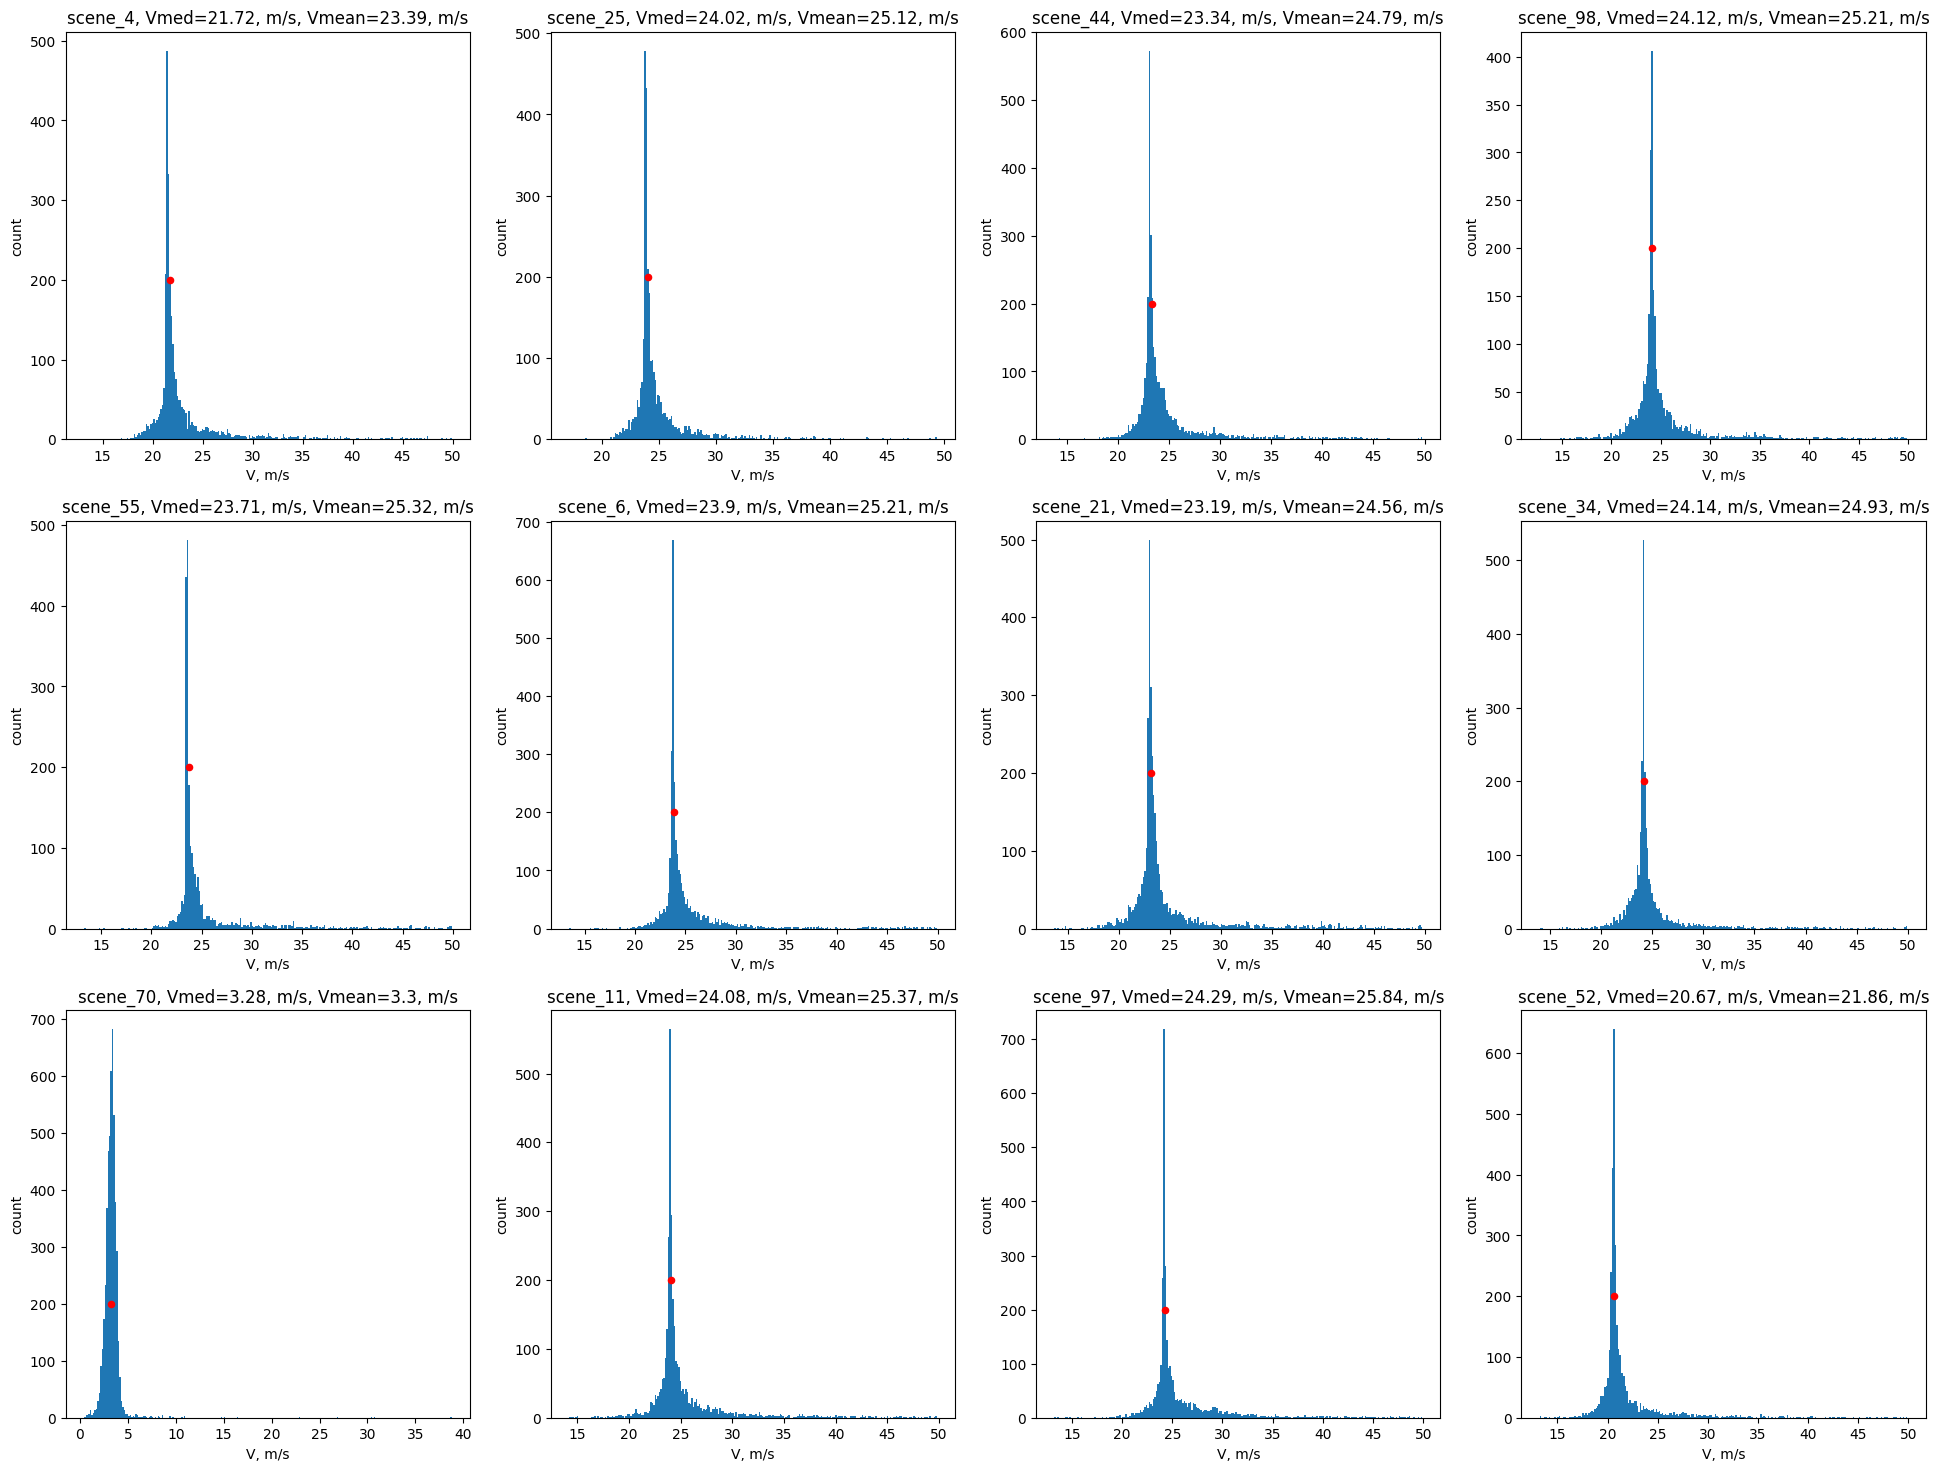

In [5]:
plt.figure(figsize=(24, 18))
for ind, i in tqdm(enumerate([4, 25, 44, 98, 55, 6, 21, 34, 70, 11, 97, 52])):
    radar_df = pd.read_csv(f"../data/processed data/radar_data_{i}.csv")
    clean_radar_df = radar_df[radar_df["QPDH0"] < 0.5]
    v_data = []
    for k, v in radar_positions.items():
        v_data.extend(
            (
                clean_radar_df[clean_radar_df["radar_idx"] == k][
                    "AbsoluteRadialVelocity"
                ]
                - clean_radar_df[clean_radar_df["radar_idx"] == k][
                    "RelativeRadialVelocity"
                ]
            )
            / (clean_radar_df[clean_radar_df["radar_idx"] == k]["X, (m)"] - v[0])
            * (
                (clean_radar_df[clean_radar_df["radar_idx"] == k]["X, (m)"] - v[0]) ** 2
                + (clean_radar_df[clean_radar_df["radar_idx"] == k]["Y, (m)"] - v[1])
                ** 2
            )
            ** 0.5
        )
    v_data = np.array(v_data)
    v_data = v_data[np.abs(v_data - 25) <= 25]
    plt.subplot(3, 4, ind + 1)
    plt.hist(v_data, bins=250)
    plt.scatter((np.median(v_data),), (200,), s=20, c="red")
    plt.title(
        f"scene_{i}, Vmed={round(np.median(v_data), 2)}, m/s, Vmean={round(np.mean(v_data), 2)}, m/s"
    )
    plt.xlabel("V, m/s")
    plt.ylabel("count")

6it [00:03,  1.84it/s]


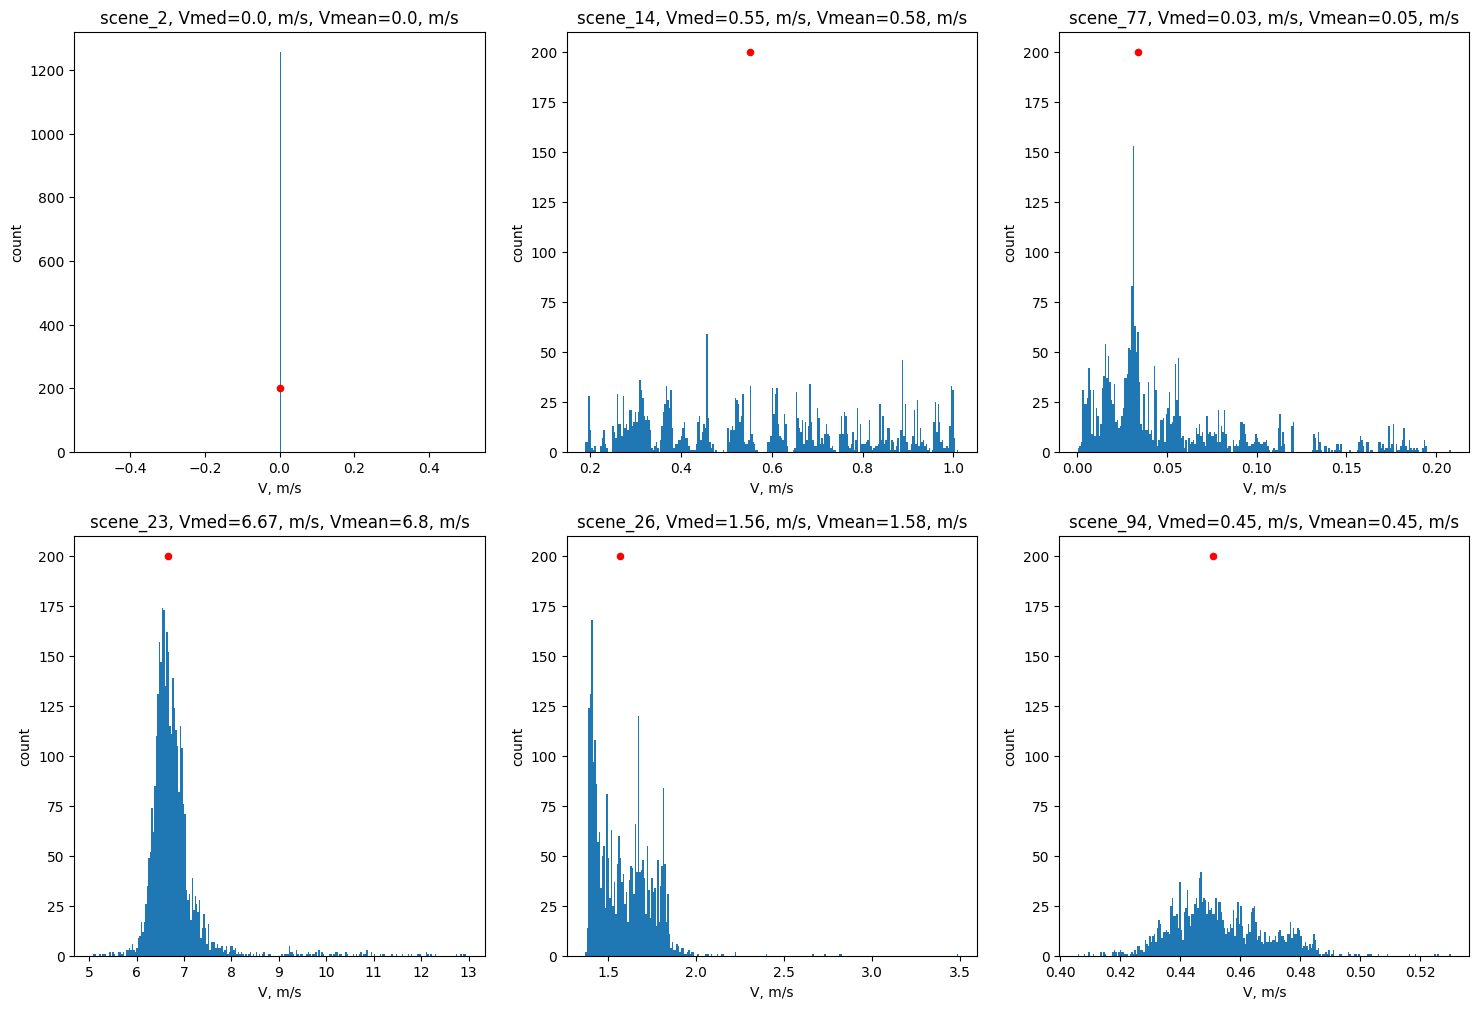

In [6]:
plt.figure(figsize=(18, 12))
for ind, i in tqdm(enumerate([2, 14, 77, 23, 26, 94])):
    radar_df = pd.read_csv(f"../data/processed data/radar_data_{i}.csv")
    clean_radar_df = radar_df[radar_df["QPDH0"] < 0.5]
    v_data = []
    for k, v in radar_positions.items():
        v_data.extend(
            (
                clean_radar_df[clean_radar_df["radar_idx"] == k][
                    "AbsoluteRadialVelocity"
                ]
                - clean_radar_df[clean_radar_df["radar_idx"] == k][
                    "RelativeRadialVelocity"
                ]
            )
            / (clean_radar_df[clean_radar_df["radar_idx"] == k]["X, (m)"] - v[0])
            * (
                (clean_radar_df[clean_radar_df["radar_idx"] == k]["X, (m)"] - v[0]) ** 2
                + (clean_radar_df[clean_radar_df["radar_idx"] == k]["Y, (m)"] - v[1])
                ** 2
            )
            ** 0.5
        )
    v_data = np.array(v_data)
    v_data = v_data[np.abs(v_data - 25) <= 25]
    plt.subplot(2, 3, ind + 1)
    plt.hist(v_data, bins=250)
    plt.scatter((np.median(v_data),), (200,), s=20, c="red")
    plt.title(
        f"scene_{i}, Vmed={round(np.median(v_data), 2)}, m/s, Vmean={round(np.mean(v_data), 2)}, m/s"
    )
    plt.xlabel("V, m/s")
    plt.ylabel("count")